In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import importlib
from wikisim import rsa

roi_dir = '/Users/morton/Dropbox/work/bender/batch/glm/prex_stim2/roi'

In [2]:
func_rois = rsa.get_rois('func')
pmat_rois = rsa.get_rois('pmat')
all_rois = pd.concat((func_rois, pmat_rois), axis=0)
rois = all_rois.loc[all_rois['net'].isin(['face', 'scene', 'hpc'])].copy()
corr = rsa.load_roi_corr(roi_dir, rois.index)

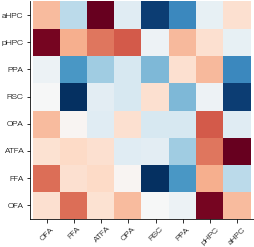

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.pcolor(np.mean(corr['face'], 0) - np.mean(corr['scene'], 0),
          cmap='RdBu_r')
ax.axis('equal');
ticks = np.arange(8) + .5
ax.set(xticks=ticks, yticks=ticks, 
       xticklabels=rois['roi_label'], yticklabels=rois['roi_label']);
ax.tick_params('x', labelrotation=45)

In [4]:
print(rois)

            roi_label    net net_label  net_id
r_ofa             OFA   face      Face       0
b_ffa             FFA   face      Face       0
b_pat            ATFA   face      Face       0
b_opa             OPA  scene     Scene       1
b_rsc             RSC  scene     Scene       1
b_ppa             PPA  scene     Scene       1
b_fshs_phpc      pHPC    hpc       HPC       1
b_fshs_ahpc      aHPC    hpc       HPC       1


In [5]:
func_rois = rois['roi_label'][:6]
df = {}
diff = corr['face'][:, :, 6:] - corr['scene'][:, :, 6:]
for i, roi in enumerate(func_rois):
    x = diff[:, i, :]
    df[roi] = pd.DataFrame(x, columns=['pHPC', 'aHPC'])

In [6]:
sig_rois = ['ATFA', 'OFA', 'OPA', 'RSC', 'PPA']
sign_rois = [1, -1, -1, -1, -1]
results = {}
for roi, sign in zip(sig_rois, sign_rois):
    p, p_cor = rsa.sign_perm(df[roi].to_numpy() * sign, 100000, method='fwe', tail='right')
    temp = df[roi] * sign
    st = temp.agg(['mean', 'sem', 'std'])
    st.loc['d'] = st.loc['mean'].abs() / st.loc['std']
    st.loc['p'] = p
    st.loc['p_cor'] = p_cor
    results[roi] = st

In [7]:
for roi, res in results.items():
    print(roi)
    display(res)

ATFA


,pHPC,aHPC
mean,0.030864,0.068864
sem,0.033974,0.024323
std,0.195168,0.139726
d,0.158141,0.492852
p,0.186108,0.004190
p_cor,0.256907,0.023830


OFA


,pHPC,aHPC
mean,-0.065640,-0.012973
sem,0.024414,0.034276
std,0.140248,0.196903
d,0.468030,0.065883
p,0.994220,0.644504
p_cor,0.998960,0.822292


OPA


,pHPC,aHPC
mean,-0.037188,0.023016
sem,0.028098,0.037746
std,0.161410,0.216836
d,0.230394,0.106143
p,0.903851,0.275337
p_cor,0.949941,0.362006


RSC


,pHPC,aHPC
mean,0.017136,0.090630
sem,0.029070,0.029403
std,0.166996,0.168908
d,0.102610,0.536562
p,0.279007,0.002420
p_cor,0.432296,0.002690


PPA


,pHPC,aHPC
mean,-0.013653,0.065875
sem,0.027140,0.031311
std,0.155910,0.179866
d,0.087568,0.366247
p,0.691113,0.022010
p_cor,0.837002,0.026990
